***Task-3***

## Number_Recognition_MNIST

In [1]:
#Import necessary libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# Load MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


In [3]:
# Display the shape of the test dataset
X_test.shape

(10000, 28, 28)

In [4]:
# Display the label in the training data set
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

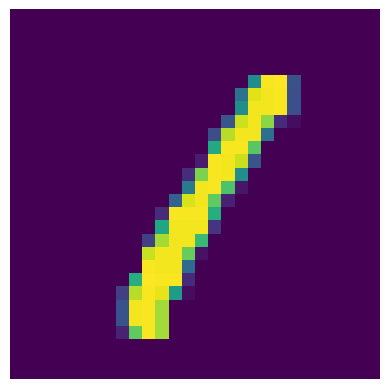

In [6]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Display an image from the training set
plt.imshow(X_train[3])
plt.axis('off')

In [7]:
#Normalize the pixel values to a range between 0 and 1
X_train = X_train/255
X_test = X_test/255

# Display normalized pixel values of the first image
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
# Train the model and store training history
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2847 - accuracy: 0.9170 - val_loss: 0.1441 - val_accuracy: 0.9594
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1227 - accuracy: 0.9632 - val_loss: 0.1275 - val_accuracy: 0.9615
Epoch 3/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9737 - val_loss: 0.0989 - val_accuracy: 0.9687
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.1004 - val_accuracy: 0.9699
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0502 - accuracy: 0.9840 - val_loss: 0.1018 - val_accuracy: 0.9721
Epoch 6/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.1046 - val_accuracy: 0.9711
Epoch 7/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9885 - val_loss: 0.0943 - val_accuracy:

In [12]:
# Make predictions on the test data
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [13]:
# Get the predicted labels by selecting the class with the highest probability
y_pred = y_prob.argmax(axis=1)

In [14]:
# Import accuracy_score for calculating accuracy
from sklearn.metrics import accuracy_score

# Calculate and display accuracy score
accuracy_score(y_test,y_pred)

0.9785

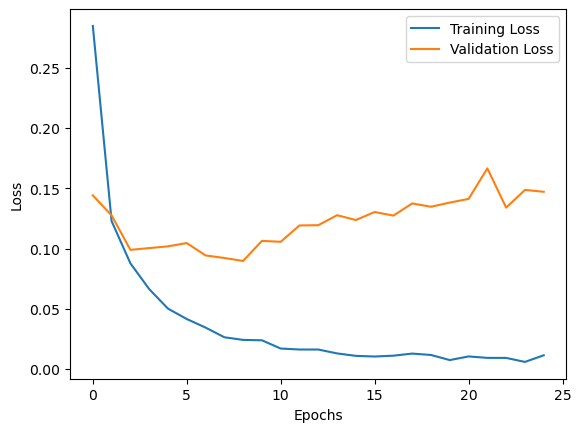

In [15]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

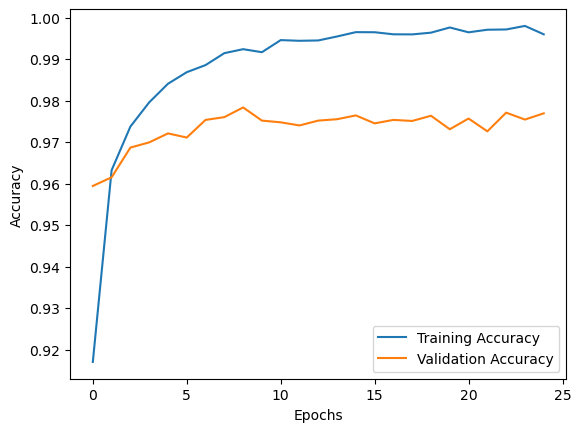

In [16]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

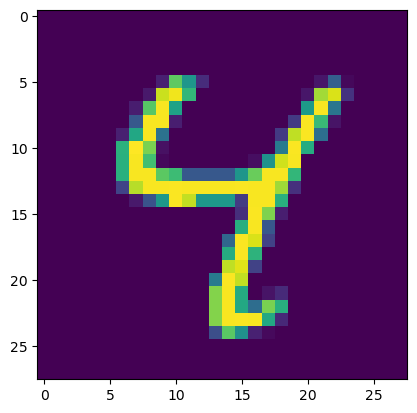

In [18]:
# Display an image from the test set
plt.imshow(X_test[6])

In [19]:
# Make a prediction on a single test image and display the predicted label
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 38ms/step


array([0], dtype=int64)